# Pymaceuticals Inc

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)

# view the data
mouse_drug_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
# view the data   NOTE:  several values of 0 seen
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# view of the data  NOTE:  There is a count of 250 but there are 249 unique mice and only 10 unique drugs
mouse_drug_df.describe()

,Mouse ID,Drug
count,250,250
unique,249,10
top,g989,Zoniferol
freq,2,25


In [4]:
# view of the data - described as a check
clinical_trial_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.455258,1.021659
std,14.079460,8.888824,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.957919,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


### Combined Data Frame

In [5]:
# Combine the data into a single dataset
    #REDO WITH INNER! (also tried left and no difference) TO SEE IF THIS SHOULD BE OUTER?  
combined_trial_df = pd.merge(mouse_drug_df, clinical_trial_df,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
combined_trial_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint # Convert to DataFrame
tumor_volume = pd.DataFrame(combined_trial_df.groupby(['Drug',"Timepoint"]).mean()['Tumor Volume (mm3)'])


# Preview DataFrame  # NOTE:  Ramicane has tumor volume of 34....
tumor_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [8]:
# total tumor volume average is 52 with the min actually being ramicane the max belongs to ketapril
tumor_volume.describe()

,Tumor Volume (mm3)
count,100.000000
mean,52.345216
std,8.980674
min,34.955595
25%,45.000000
50%,51.444575
75%,59.813482
max,70.662958


#### Standard Error for Tumor Volumes

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint  # Convert to DataFrame 
# ramicane and capomulin both have sem of 1.22 
tumor_volume_sem = pd.DataFrame(combined_trial_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])

# Preview DataFrame
tumor_volume_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [10]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume = tumor_volume.reset_index()
tumor_volume_pivot = tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_volume_sem = tumor_volume_sem.reset_index()
tumor_volume_sem_pivot = tumor_volume_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# again - it looks like Ramicane and capomulin are similar but ramicane shrinks tumors a bit better? 
# Preview that Reformatting worked
tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## GRAPH: TUMOR RESPONSE TO TREATMENT

No handles with labels found to put in legend.


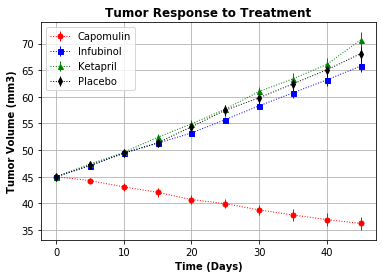

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Capomulin"],
             yerr=tumor_volume_sem_pivot["Capomulin"],color="r", marker="o", markersize=5, 
             linestyle="dotted", linewidth=1)
plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Infubinol"], 
             yerr=tumor_volume_sem_pivot["Infubinol"], color="b", marker="s", markersize=5, 
             linestyle="dotted", linewidth=1)
plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Ketapril"], 
             yerr=tumor_volume_sem_pivot["Ketapril"], color="g", marker="^", markersize=5, 
             linestyle="dotted", linewidth=1)
plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Placebo"], 
             yerr=tumor_volume_sem_pivot["Placebo"], color="k", marker="d", markersize=5, 
             linestyle="dotted", linewidth=1)
             
plt.title("Tumor Response to Treatment", weight='bold')
plt.ylabel("Tumor Volume (mm3)", weight='bold')
plt.xlabel("Time (Days)", weight='bold')
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))

# Save the Figure
plt.savefig("PymacuticalsFig1.png")


In [12]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites_mean = combined_trial_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_sites_df = pd.DataFrame(metastatic_sites_mean)

# Preview DataFrame
metastatic_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

#### Standard Error for Metastic Sites

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_sem = combined_trial_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
metastatic_sem_df = pd.DataFrame(metastatic_sites_sem)

# Preview DataFrame
metastatic_sem_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_mean = metastatic_sites_mean.reset_index()
metastatic_sites_mean_pivot = metastatic_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

metastatic_sites_sem = metastatic_sites_sem.reset_index()
metastatic_sites_sem_pivot = metastatic_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]



# Preview that Reformatting worked
metastatic_sites_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


# GRAPH: Metastic Spread During Treatment

No handles with labels found to put in legend.


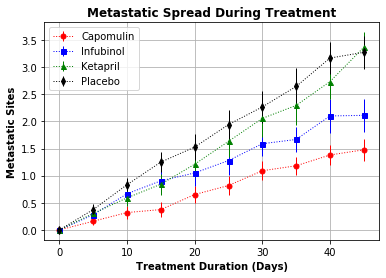

In [16]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_sites_mean_pivot.index, metastatic_sites_mean_pivot["Capomulin"], 
             yerr=metastatic_sites_sem_pivot["Capomulin"], color="r", marker="o", markersize=5, 
             linestyle="dotted", linewidth=1)
plt.errorbar(metastatic_sites_mean_pivot.index, metastatic_sites_mean_pivot["Infubinol"], 
             yerr=metastatic_sites_sem_pivot["Infubinol"], color="b", marker="s", markersize=5, 
             linestyle="dotted", linewidth=1)
plt.errorbar(metastatic_sites_mean_pivot.index, metastatic_sites_mean_pivot["Ketapril"], 
             yerr=metastatic_sites_sem_pivot["Ketapril"], color="g", marker="^", markersize=5, 
             linestyle="dotted", linewidth=1)
plt.errorbar(metastatic_sites_mean_pivot.index, metastatic_sites_mean_pivot["Placebo"], 
             yerr=metastatic_sites_sem_pivot["Placebo"], color="k", marker="d", markersize=5, 
             linestyle="dotted", linewidth=1)

plt.title("Metastatic Spread During Treatment", weight='bold')
plt.grid(True)
plt.ylabel("Metastatic Sites",weight='bold')
plt.xlabel("Treatment Duration (Days)",weight='bold')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))

# Save the Figure
plt.savefig("PymacuticalsFig2.png")

# Show the Figure


## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = combined_trial_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count_df = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [18]:
# An average of only 19 mice survived? 
survival_count_df.describe()

,Mouse Count
count,100.000000
mean,19.060000
std,4.785964
min,7.000000
25%,15.000000
50%,20.000000
75%,23.000000
max,26.000000


In [19]:
# Minor Data Munging to Re-Format the Data Frames
survival_count_df = survival_count_df.reset_index()
survival_count_pivot = survival_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [20]:
survival_count_pivot.describe()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,23.000000,17.800000,17.800000,18.800000,18.600000,18.100000,16.100000,22.800000,19.400000,18.200000
std,1.632993,3.705851,5.788878,4.022161,4.005552,5.130519,6.756889,1.873796,5.189733,4.366539
min,21.000000,13.000000,9.000000,11.000000,13.000000,11.000000,7.000000,20.000000,11.000000,14.000000
25%,22.000000,14.500000,13.250000,17.250000,15.000000,14.250000,10.750000,21.500000,16.500000,14.250000
50%,22.500000,18.000000,19.000000,19.000000,19.000000,18.000000,15.500000,23.000000,20.000000,16.500000
75%,24.750000,19.750000,21.000000,21.250000,21.000000,23.000000,21.500000,24.000000,23.000000,21.750000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,25.000000,26.000000,25.000000


# GRAPH: Survival During Treatment

No handles with labels found to put in legend.


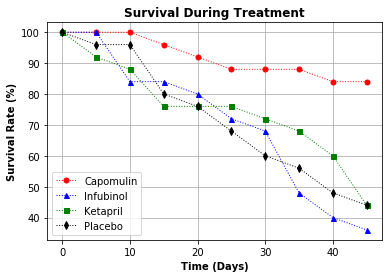

In [21]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dotted", markersize=5, linewidth=1)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dotted", markersize=5, linewidth=1)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dotted", markersize=5, linewidth=1)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dotted", markersize=5, linewidth=1)


plt.title("Survival During Treatment", weight='bold')
plt.ylabel("Survival Rate (%)",weight='bold')
plt.xlabel("Time (Days)", weight='bold')
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))

# Save the Figure
plt.savefig("PymarcuticalsFig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug
tumor_change =  100 * (tumor_volume_pivot.iloc[-1] - tumor_volume_pivot.iloc[0]) / tumor_volume_pivot.iloc[0]
tumor_change_sem = 100 * (tumor_volume_sem_pivot.iloc[-1] - tumor_volume_sem_pivot.iloc[0]) / tumor_volume_sem_pivot.iloc[0]

# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [23]:
#curious about the Ramicane - if that is the -22 percent tumor change, why is that not the top pick? survival rate?

tumor_change.describe()

count    10.000000
mean     35.499992
std      30.029239
min     -22.320900
25%      43.418237
50%      46.910463
75%      51.888341
max      57.028795
dtype: float64

# GRAPH:  Tumor Change Over 45 Day Treatment

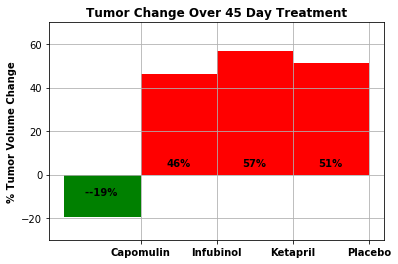

In [24]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (tumor_change["Capomulin"],
               tumor_change["Infubinol"],
               tumor_change["Ketapril"],
               tumor_change["Placebo"])

fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))
width = 1
rectsPass = ax.bar(ind[0], percent_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc.
ax.set_ylabel('% Tumor Volume Change', weight='bold')
ax.set_title('Tumor Change Over 45 Day Treatment', weight='bold')
ax.set_xticks(ind + 0.50)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),weight='bold')

ax.set_ylim([-30,70])
ax.grid(True)
# Splice the data between passing and failing drugs

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va = 'bottom', color="black", weight='bold')

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha = 'center', va = 'center', color="black", weight='bold')

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("PymarcuticalFig4.png")

# Show the Figure
fig.show()




######    CONCLUSIONS

The data available tracks ten drugs and 250 mice over the course of a 45 day treatment. During the time frame studied, there were some clear winners and losers in the treatment of the mice.

Tumor response to treament shows that there are two drugs Capomulin and Ramicane that had the best turmor responses
with Capomulin having tumor volume drop from 45 to 36 over the 45 days. Ramicane's tumor volume dropped slightly more to 34. 
The worst drop in volume going to ketapril with an increase in volume from 45 to 70. 

Metastatic response to treatment measures the number of metastases over time which showed that Capomulin and Ramicane 
each having the fewest average cancer sites of 1.5 and 1.3 respectively.  The worst over time belonging to Ketapril which had 
an average site increase of 3.4.  

Finally, we review the survival rates of the mice over 45 days and we find again two clear winners, with a starting point of 25 mice, Capomulin still had 21 mice and Ramicane had 20.  The worst survival rate belongs to Propriva with only 7 mice surviving treatment. 

Overall, there are two clear winners for treament, Capomulin and Ramicane.  The other drugs, including the placebo, did not shrink the tumor volume nearly as much.  Nor did these drugs prevent the spread of the cancer as well as the two winning drugs.  The non-winning drugs had significantly less survivers of the treatments over time which for the research mice sake, impact any decision to use them.  
